In [171]:
include("DenseNTK.jl")
include("FastNTK.jl")
eig(K) = abs.(eigen(K).values); # get eigen_values of Kernel

In [92]:
Nx=300
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec)); 

In [125]:
Nh = 1000
act = relu

model = Chain(DenseNTK(1,Nh,act),DenseNTK(Nh,1))

Chain(
  DenseNTK(Float32[1.032905; -1.1008857; … ; 0.8694419; 0.15585299;;], Float32[-0.81271344, -1.2919325, -0.40486145, -1.6386251, 1.9417535, -0.60890436, -0.8803959, -1.1076643, 0.73547506, 0.47221074  …  1.25109, 1.3263217, -0.31033993, 1.903349, 0.001328541, 1.4952416, -0.32828924, -0.109281994, -0.10357705, 0.9512022], NNlib.relu),  # 2_000 parameters
  DenseNTK(Float32[0.5226816 -0.69579655 … 0.66593456 -0.15847318], Float32[0.14199075], identity),  # 1_001 parameters
)                   # Total: 4 arrays, 3_001 parameters, 12.020 KiB.

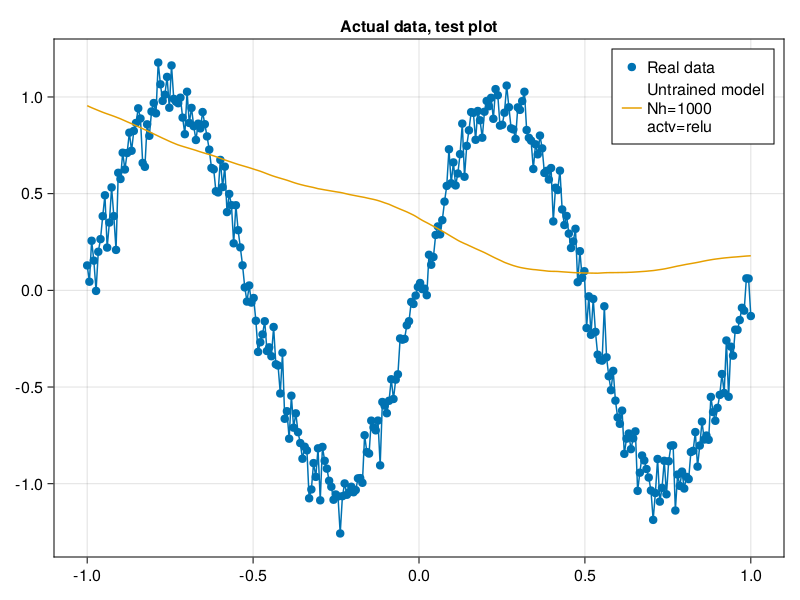

In [182]:
using CairoMakie

fig = Figure()
ax1 = Axis(fig[1,1], title="Actual data, test plot")

CairoMakie.lines!(xVec[:], yVec[:])
CairoMakie.scatter!(xVec[:], yVec[:], label="Real data")

CairoMakie.lines!(xVec[:], model(hcat(xVec...))[:], label="Untrained model\nNh=$Nh\nactv=$act")

axislegend(ax1,position=:rt)
fig

<h1>Trektin</h1>

In [165]:
using Distributions

a = -1.0;
b = 1.0;
Nx = 400
IN = 10

# Generate random matrix with numbers from a to b (inclusive)
xTrekt = rand(Uniform(-1,1),IN,Nx)

10×400 Matrix{Float64}:
  0.253639   -0.923314    0.931805  …   0.153831   -0.432493    0.75562
 -0.0748463  -0.444059    0.588985      0.88142    -0.305227    0.328767
 -0.778796    0.875345    0.118418     -0.446236    0.0211938   0.918108
 -0.914256   -0.0132089   0.066096      0.712091    0.572525    0.298303
 -0.0494648  -0.329328    0.427058      0.790189    0.196337    0.589777
  0.0212273  -0.896961    0.196461  …  -0.777765    0.531851   -0.176576
  0.886924   -0.291292   -0.149649      0.107608   -0.164808    0.163386
 -0.138584   -0.102778   -0.14492      -0.0642559   0.497517   -0.847949
  0.683035   -0.542561    0.166616     -0.0837355   0.971394   -0.13415
 -0.551399    0.119097   -0.682067     -0.483729   -0.378076    0.0556069

In [167]:
OUT = 3
ACT = relu

trekt3 = Chain(DenseNTK(IN, 8, ACT), DenseNTK(8,7, ACT), DenseNTK(7,5,ACT), DenseNTK(5,OUT));

In [168]:
K_trekt3 = kernel(trekt3, xTrekt,true);


Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


In [176]:
eig_trekt3 = eig(K_trekt3)

3600-element Vector{Float64}:
    6.743414729861353e-13
    3.767175261499303e-13
    1.3552414257164848e-13
    4.5932598578878134e-14
    2.301086966681522e-14
    9.432563474319245e-15
    7.197501956549912e-15
    3.734154409440138e-15
    3.597165967872407e-15
    2.1341878135700197e-15
    ⋮
   12.15745273998362
   13.517339207238566
   15.302757936831636
   19.902876276208005
   30.58327195485894
   46.70662411087734
  486.8042644805903
 1086.7140707028789
 1463.3924596899317

In [192]:
using CairoMakie

fig = Figure()
ax1 = Axis(fig[1,1], yscale=log10, title="Actual data, test plot")

CairoMakie.lines!(eig_trekt3[:])


axislegend(ax1,position=:lt)
fig

ErrorException: There are no plots with labels in the given axis that can be put in the legend. Supply labels to plotting functions like `plot(args...; label = "My label")`